KMeans Accuracy: 21.179624664879356%
Spectral Clustering Accuracy: 73.9946380697051%


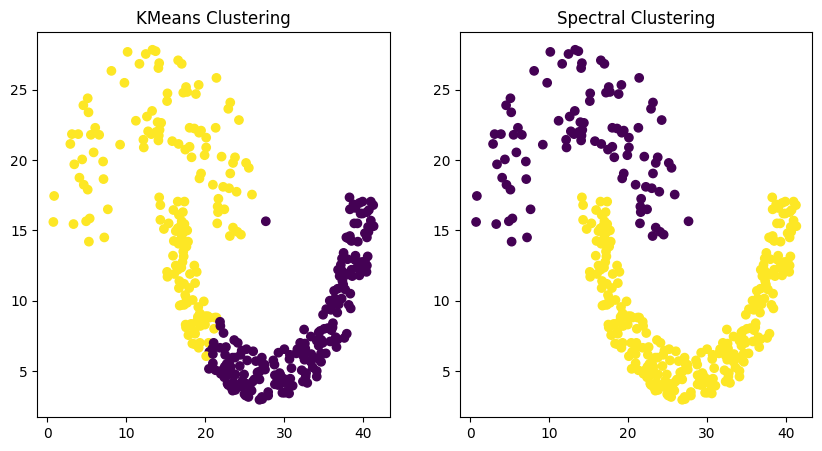

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from jain.txt
data = np.loadtxt("jain.txt")

# Extract features (X, Y) and ground truth labels
X = data[:, :2]
ground_truth_labels = data[:, 2]

def kmeans_clustering(X, n_clusters):
    # Initialize centroids randomly
    centroids = X[np.random.choice(len(X), n_clusters, replace=False)]
    
    for _ in range(10):  # 10 iterations of KMeans
        # Assign each data point to the closest centroid
        labels = ((X[:, None] - centroids[None]) ** 2).sum(axis=-1).argmin(axis=-1)
        
        # Update centroids to be the mean of the assigned data points
        for i in range(n_clusters):
            centroids[i] = X[labels == i].mean(axis=0)
    
    return labels

def spectral_clustering(X, n_clusters):
    # Step 1: Compute the similarity matrix
    W = np.exp(-np.sum((X[:, None] - X[None]) ** 2, axis=-1) / 2)

    # Step 2: Compute the Degree matrix
    D = np.diag(W.sum(axis=1))

    # Step 3: Compute the Laplacian matrix
    L = D - W

    # Step 4: Compute the eigenvalues and eigenvectors of L
    eigenvalues, eigenvectors = np.linalg.eig(L)

    # Step 5: Select the k eigenvectors corresponding to the k smallest eigenvalues
    indices = np.argsort(eigenvalues)[:n_clusters]
    U = eigenvectors[:, indices]

    # Step 6: Normalize the row of U
    U = U / np.sqrt((U ** 2).sum(axis=1, keepdims=True))

    # Step 7: Apply KMeans on the row of U
    centroids = U[np.random.choice(len(U), n_clusters, replace=False)]
    for _ in range(10):  # 10 iterations of KMeans
        labels = ((U[:, None] - centroids[None]) ** 2).sum(axis=-1).argmin(axis=-1)
        for i in range(n_clusters):
            centroids[i] = U[labels == i].mean(axis=0)

    return labels

def calculate_accuracy(predicted_labels, ground_truth_labels):
    # Ensure the labels are numpy arrays
    predicted_labels = np.array(predicted_labels)
    ground_truth_labels = np.array(ground_truth_labels)

    # Calculate the accuracy
    accuracy = np.sum(predicted_labels == ground_truth_labels) / len(ground_truth_labels)

    return accuracy

# Apply KMeans clustering
kmeans_labels = kmeans_clustering(X, n_clusters=2)
# Calculate the accuracy
kmeans_accuracy = calculate_accuracy(kmeans_labels, ground_truth_labels)
print(f"KMeans Accuracy: {kmeans_accuracy * 100}%")

# Apply spectral clustering
spectral_labels = spectral_clustering(X, n_clusters=2)
# Calculate the accuracy
spectral_accuracy = calculate_accuracy(spectral_labels, ground_truth_labels)
print(f"Spectral Clustering Accuracy: {spectral_accuracy * 100}%")

# Plot the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels)
plt.title('KMeans Clustering')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=spectral_labels)
plt.title('Spectral Clustering')

plt.show()